In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Classroom/AI/FinalProject

/content/drive/MyDrive/Classroom/AI/FinalProject


In [ ]:
!pip install opencv-python mediapipe pandas numpy tensorflow

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- 1. Data Loading & Preprocessing ---
filename = '/content/drive/MyDrive/Classroom/AI/FinalProject/dataset/hand_keypoints.csv'
df = pd.read_csv(filename)

# Separating features (coordinates) and target (labels)
X = df.iloc[:, 2:].values
y = df.iloc[:, 0].values

try:
    X = X.astype('float32')
    print("Data type conversion success")
except ValueError:
    print("Error: There is non-number in coordinate column, check the CSV file.")

# Encode labels (A, B, C -> 0, 1, 2)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Save label mapping for Android app usage
classes = encoder.classes_
np.savetxt('labels.txt', classes, fmt='%s')
print(f"Label ditemukan ({len(classes)}): {classes}")

# Split data (80% Train, 20% Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data X shape:", X_train.shape)
print("Data X type:", X_train.dtype)

# --- 2. Model Architecture ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(len(classes), activation='softmax')
])

# --- 3. Compilation ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 4. Training ---
print("\nStarting training...")
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# --- 5. Evaluation ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Validation Accuracy: {accuracy * 100:.2f}%")

# --- 6. Save Model ---
model_name = 'revised_hand_sign_model.h5'
model.save(model_name)
print(f"Model saved as {model_name}")

Data type conversion success
Label ditemukan (27): ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'space']
Data X shape: (10760, 42)
Data X type: float32

Starting training...
Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0715 - loss: 3.2083 - val_accuracy: 0.4082 - val_loss: 2.1449
Epoch 2/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3155 - loss: 2.0787 - val_accuracy: 0.6796 - val_loss: 1.1384
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5242 - loss: 1.2986 - val_accuracy: 0.8019 - val_loss: 0.6589
Epoch 4/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6374 - loss: 0.9438 - val_accuracy: 0.9000 - val_loss: 0.4568
Epoch 5/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7137 - loss: 0.7341 - val_accuracy: 0.9045 - val_loss: 0.3757
Epoch 6/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7632 - loss: 0.6166 - val_accuracy: 0.9331 - val_lo


Final Validation Accuracy: 99.85%
Model saved as revised_hand_sign_model.h5


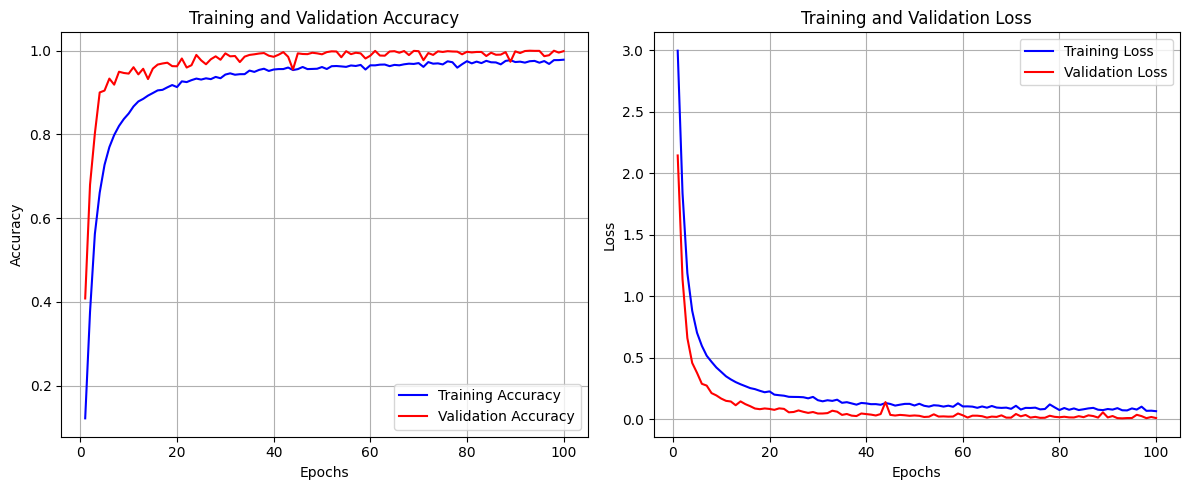

In [4]:
import matplotlib.pyplot as plt

# Take the training data results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# --- 1st PLOT: ACCURACY ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- 2nd PLOT: LOSS ---
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
import tensorflow as tf

# --- 1. Load the Previously Trained Model ---
model_name = '/content/drive/MyDrive/Classroom/AI/FinalProject/revised_hand_sign_model.h5'
model = tf.keras.models.load_model(model_name)

# --- 2. Setup Converter ---
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

# --- 3. Perform Conversion ---
print("Converting model to TFLite...")
tflite_model = converter.convert()

# --- 4. Save the .tflite File ---
tflite_filename = 'revised_hand_sign_model.tflite'
with open(tflite_filename, 'wb') as f:
    f.write(tflite_model)

print(f"\nSUCCESS! Model saved as: {tflite_filename}")

Converting model to TFLite...
Saved artifact at '/tmp/tmptayvkhjf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  140544416202384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544416202576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413384976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413384784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413389200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413389968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413390544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140544413391120: TensorSpec(shape=(), dtype=tf.resource, name=None)

SUCCESS! Model saved as: revised_hand_sign_model.tflite


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
filename = '/content/drive/MyDrive/Classroom/AI/FinalProject/dataset/hand_keypoints.csv'
df = pd.read_csv(filename)
X = df.iloc[:, 2:].values.astype('float32')
y = df.iloc[:, 0].values

# 2. Encode the dataset once again
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
classes = encoder.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("✅ Data X_test berhasil dipulihkan!")

# 3. Load the model again
model_path = '/content/drive/MyDrive/Classroom/AI/FinalProject/revised_hand_sign_model.h5'
try:
    model = tf.keras.models.load_model(model_path)
    print("✅ Model berhasil di-load tanpa training ulang!")
except:
    print("❌ File model tidak ditemukan. Pastikan file 'hand_sign_model.h5' ada di folder.")

✅ Data X_test berhasil dipulihkan!
✅ Model berhasil di-load tanpa training ulang!


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
=== PREDICTION TEST RESULTS (100 SAMPLES) ===

Sample #1: True [P] --> Pred [P] (100.0%) ✅
Sample #2: True [D] --> Pred [D] (100.0%) ✅
Sample #3: True [J] --> Pred [J] (100.0%) ✅
Sample #4: True [C] --> Pred [C] (100.0%) ✅
Sample #5: True [H] --> Pred [H] (100.0%) ✅
Sample #6: True [G] --> Pred [G] (100.0%) ✅
Sample #7: True [T] --> Pred [T] (100.0%) ✅
Sample #8: True [N] --> Pred [N] (99.9%) ✅
Sample #9: True [I] --> Pred [I] (100.0%) ✅
Sample #10: True [N] --> Pred [N] (98.6%) ✅
Sample #11: True [X] --> Pred [X] (100.0%) ✅
Sample #12: True [R] --> Pred [R] (96.8%) ✅
Sample #13: True [Z] --> Pred [Z] (100.0%) ✅
Sample #14: True [T] --> Pred [T] (99.8%) ✅
Sample #15: True [Z] --> Pred [Z] (100.0%) ✅
Sample #16: True [D] --> Pred [D] (100.0%) ✅
Sample #17: True [H] --> Pred [H] (100.0%) ✅
Sample #18: True [O] --> Pred [O] (99.6%) ✅
Sample #19: True [L] --> Pred [L] (100.0%) ✅
Sample #20: True [space] --> Pred [space] (100.0%) ✅
Sample #21: True [G] 

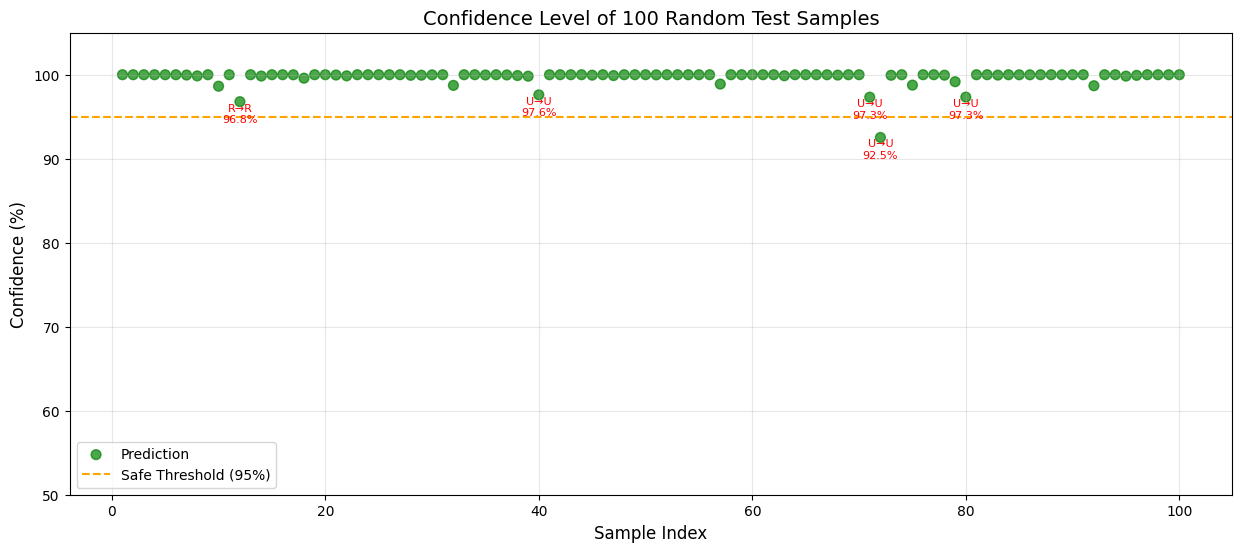

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SETTINGS ---
NUM_SAMPLES = 100

indices = np.random.choice(len(X_test), NUM_SAMPLES, replace=False)
X_samples = X_test[indices]
y_true_samples = y_test[indices]
predictions = model.predict(X_samples)

# For plotting area
confidences = []
is_correct = []
labels = []
indices_x = range(1, NUM_SAMPLES + 1)

print(f"=== PREDICTION TEST RESULTS ({NUM_SAMPLES} SAMPLES) ===\n")

# --- 2. LOOPING & PROCESSING ---
for i in range(NUM_SAMPLES):
    # Ambil probabilitas tertinggi
    pred_idx = np.argmax(predictions[i])
    confidence = predictions[i][pred_idx]

    # Decode label (0 -> 'A')
    true_label = encoder.inverse_transform([y_true_samples[i]])[0]
    pred_label = encoder.inverse_transform([pred_idx])[0]

    # Cek benar/salah
    correct = (true_label == pred_label)
    status = "✅" if correct else "❌"

    # Simpan data untuk plotting
    confidences.append(confidence * 100) # Jadikan persen
    is_correct.append(correct)
    labels.append(f"{true_label}→{pred_label}")

    # Print text log (seperti sebelumnya)
    print(f"Sample #{i+1}: True [{true_label}] --> Pred [{pred_label}] ({confidence*100:.1f}%) {status}")

# --- 3. VISUALIZATION ---
plt.figure(figsize=(15, 6))

# Tentukan warna: Hijau jika benar, Merah jika salah
colors = ['green' if c else 'red' for c in is_correct]

# Buat Scatter Plot
plt.scatter(indices_x, confidences, c=colors, s=50, alpha=0.7, label='Prediction')

# Tambahkan garis batas aman (Threshold 95%)
plt.axhline(y=95, color='orange', linestyle='--', label='Safe Threshold (95%)')

# Anotasi: Tandai titik yang confidencenya di bawah 98% (supaya kelihatan yang "sulit")
for i, conf in enumerate(confidences):
    if conf < 98.0:
        plt.annotate(f"{labels[i]}\n{conf:.1f}%",
                     (indices_x[i], confidences[i]),
                     textcoords="offset points",
                     xytext=(0,-15),
                     ha='center',
                     fontsize=8,
                     color='red')

# Dekorasi Grafik
plt.title(f'Confidence Level of {NUM_SAMPLES} Random Test Samples', fontsize=14)
plt.ylabel('Confidence (%)', fontsize=12)
plt.xlabel('Sample Index', fontsize=12)
plt.ylim(50, 105)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


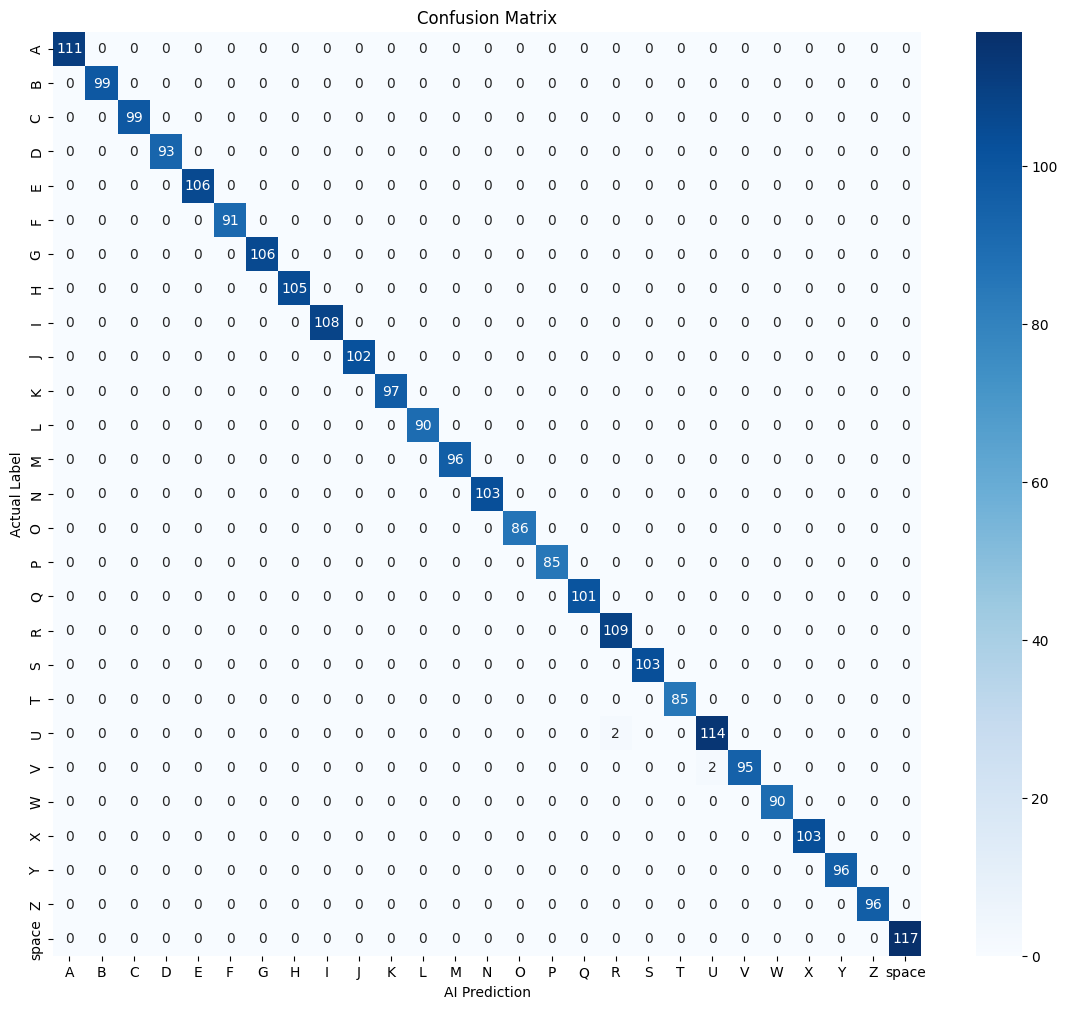

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict ALL test data
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 2. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('AI Prediction')
plt.ylabel('Actual Label')
plt.show()